<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch03/03_karaage_ai_book_tweet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitterのデータを使った例

Twitterのデータを使った分析・文章生成例

## データの前処理
AIに学習させるための下準備として、学習させるデータに対して、以下の処理を順に実施します。

1. 教師データのダウンロード
1. 教師データのテキストを分かち書きする
1. 不要なデータを削除する

### 教師データのダウンロード

Twitterのツイート分析

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving analysis_tweet.txt to analysis_tweet.txt


ファイルが重い場合はGoogle Driveから読み込みましょう

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp /content/drive/My\ Drive/twitterdata/analysis_tweet.txt /content/

In [ ]:
text_list = []
with open('analysis_tweet.txt', encoding='utf-8') as f:
  text_list = f.readlines()

In [ ]:
text_list[0:10]

["開始10秒で腹筋崩壊したw &gt; SMELLS LIKE TEEN SPIRIT - NIRVANA // ROCK'N'TOYS SESSIONS #12 - THE WACKIDS https://t.co/xdXMVfvBhv @YouTubeさんから\n",
 'ディープラーニング系の論文、要素要素は何をしているのかなんとか理解できるのですが、全体で何でこんな凄まじい性能がでるのかはサッパリ分からないですよね。\n',
 'そういうものだという理解ですが。\n',
 '@hack_tnr たしかにドロン大事\n',
 'この本、めちゃ良書な予感です。まじめな話、忍術はビジネスに使えると思います。印を結ぶことによるメンタルコントロール、なんと消臭術もあるからエチケットにも使える。あと、忍者の歴史を知ればグローバルコミュニケーションにも使えます。今年は仕事を忍術で乗り切ろうと思います。\n',
 'たまにはビジネスに役立ちそうな本でも読んでみようかなということで、今日はこの本を買って読んでみることにします。本物の忍者が書いた忍術本の決定版！ &gt; 「忍びの秘伝３１\u3000忍術教本」\n',
 'Kindle: https://t.co/e03fZmuyYi\n',
 '@satoshigarage 新しいの使っても、それほど違い感じないのですよね。鈍感なのかもw\n',
 '7年前に買ったMac Book Proを未だに使い続けてるけど、特に困ってないので買い時を逃し続けています。\n',
 'テレワークのテレって何mmですか？って凄いパワーワードw &gt; 【カメラバカにつける薬 in デジカメ Watch】テレワークよりアポワーク（その1） - デジカメ Watch https://t.co/W4Q8xdH6ps\n']

### データの前処理


In [ ]:
import re
def normalize_text(text):
   text = re.sub(r'\[.*?\]', "", text)
   text = re.sub(r'#', "", text)
   text = re.sub(r'\!', "", text)
   text = re.sub(r'\(.*', "", text)
   text = re.sub(r'.*\)', "", text)
   text = re.sub(r'\*', "", text)
   text = re.sub(r'\n', "", text)
   text = re.sub(r'\$.*', "", text)
   text = re.sub(r'`.*`', "", text)
   text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
   text = re.sub(r'@.* ', "", text)
   text = re.sub(r'@さんから', "", text)
   text = re.sub(r'【', "", text)
   text = re.sub(r'】', "", text)
   text = re.sub(r'『', "", text)
   text = re.sub(r'』', "", text)
   text = re.sub(r'「', "", text)
   text = re.sub(r'」', "", text)
   text = re.sub(r'（', "", text)
   text = re.sub(r'）', "", text)
   text = re.sub(r'〜', "", text)
   text = re.sub(r'〜', "", text)
   text = re.sub(r'-', "", text)
   text = re.sub(r'>', "", text)
   text = re.sub(r'|', "", text)
   text = re.sub(r' |', "", text)
   text = re.sub(r'[a-zA-Z]', "", text)
   text = re.sub(r'\d', "", text)
   text = re.sub(r'&', "", text)
   text = re.sub(r';', "", text)
   text = re.sub(r'/', "", text)
   text = re.sub(r'"', "", text)
   text = re.sub(r'“', "", text)
   text = re.sub(r'”', "", text)
   text = re.sub(r'\.', "", text)
   text = re.sub('以下', "", text)
   text = re.sub('こと', "", text)
   text = re.sub('の', "", text)
   text = re.sub('さ', "", text)
   text = re.sub('これ', "", text)
   text = re.sub('そう', "", text)
   text = re.sub('よう', "", text)
   text = re.sub('Raspberry Pi', "ラズパイ", text)
   text = re.sub('自分', "", text)
   text = re.sub('コメント', "", text)
   text = re.sub('こと', "", text)
   text = re.sub('さん', "", text)
   text = re.sub('それ', "", text)
   text = re.sub('とき', "", text)
   text = re.sub('今日', "", text)
   text = re.sub('明日', "", text)
   text = re.sub('みたい', "", text)
   text = re.sub('ため', "", text)
   text = re.sub('どこ', "", text)
   text = re.sub('どれ', "", text)
   text = re.sub('記事', "", text)
   text = re.sub('投稿', "", text)
   text = re.sub('ん', "", text)
   text = re.sub('一', "", text)
   text = text.strip()
   return text

In [ ]:
new_text_list = []
for text in text_list:
  text = normalize_text(text)
  new_text_list.append(text)

### 分かち書き

形態素解析ライブラリの「janome」をインストール

In [ ]:
!pip install janome

     |████████████████████████████████| 21.5MB 1.4MB/s 


名詞を抽出して分かち書きをします

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in new_text_list:
    tokens = t.tokenize(text)
    for token in tokens:
        pos = token.part_of_speech.split(',')[0]
        if pos == '名詞':
            words.append(token.surface)

text = ' '.join(words)

## WordCloudで可視化

In [ ]:
!apt -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

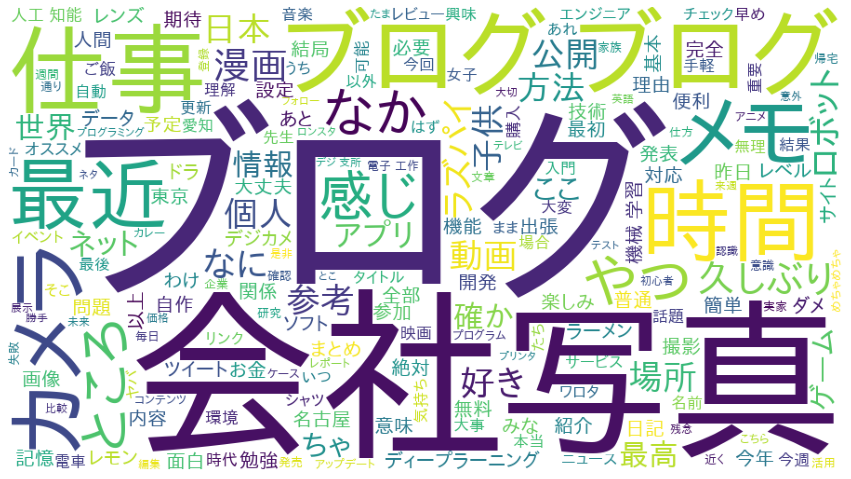

In [ ]:
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

人気のある単語を順番に並べる

In [ ]:
words = {}
for word in text.split(" "):
   words[word] = words.get(word, 0) + 1
# sort by count
d = [(v,k) for k,v in words.items()]
d.sort()
d.reverse()
for count, word in d[:100]:
   print(count, word)

3808 ブログ
3468 ー
3230 人
2028 気
1672 的
1511 こ
1472 写真
1457 私
1442 そ
1440 何
1399 会社
1396 カメラ
1322 件
1217 方
1198 今
1196 中
1181 仕事
1075 年
1021 話
1004 |
987 時間
964 :
955 め
881 メモ
826 他
819 レンズ
794 日
758 読
753 妻
742 漫画
733 最近
728 化
705 回
664 娘
661 やつ
648 学習
646 円
644 本
613 データ
599 ところ
588 感じ
583 前
582 公開
576 者
569 好き
569 会
568 画像
566 時
562 なか
552 久しぶり
541 度
539 '
531 出張
530 ロボット
525 動画
515 家
508 ディープラーニング
505 ゲーム
502 情報
497 方法
495 万
493 なに
490 場所
488 撮影
477 技術
475 開発
473 ソフト
471 ラズパイ
468 目
468 昔
455 ネット
449 日本
445 電子
445 アプリ
441 子供
436 参考
435 個人
423 僕
414 先生
412 日記
409 版
408 世界
408 ちゃ
399 無料
384 自作
383 ダメ
379 最高
378 以上
375 意味
374 ここ
372 確か
370 予定
368 環境
366 性
365 @
364 デジカメ
364 みな
363 誰
361 完全
358 笑


## マルコフ連鎖での文章生成

分かち書き（名詞以外も抽出する）

In [ ]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in new_text_list:
    tokens = t.tokenize(text)
    for token in tokens:
        pos = token.part_of_speech.split(',')[0]
        words.append(token.surface)

text = ' '.join(words)

In [ ]:
word_list = [w for w in text.split()]

In [ ]:
word_list[0:10]

['開始', '秒', 'で', '腹筋', '崩壊', 'し', 'た', "''@", 'から', 'ディープラーニング']

2階のマルコフ連鎖を定義

In [ ]:
def make_markov_model_2(text_list):
  markov = {}
  w1 = ''
  w2 = ''
  for word in text_list:
    if w1 and w2:
      if (w1, w2) not in markov:
        markov[(w1, w2)] = []
      markov[(w1, w2)].append(word)
    w1, w2 = w2, word
  return markov  

In [ ]:
markov_model_2 = make_markov_model_2(word_list)

In [ ]:
import random

def generate_text_2(model, max_sentence):
  count_sentence = 0
  sentence = ''
  w1, w2  = random.choice(list(model.keys()))
  while count_sentence < max_sentence:
    try:
      tmp = random.choice(model[(w1, w2)])
      sentence += tmp
      if(tmp=='。'):
        count_sentence += 1
        sentence += '\n'
      w1, w2 = w2, tmp
    except:
      w1, w2  = random.choice(list(model.keys()))

  return sentence

In [ ]:
print(generate_text_2(markov_model_2, 1))

で通過した記憶があるなでひたすらクソスレをたてていかなかった。

